# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [35]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# floyd run --mode jupyter --gpu --env tensorflow-1.0 --data R5KrjnANiKVhLWAkpXhNBe
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

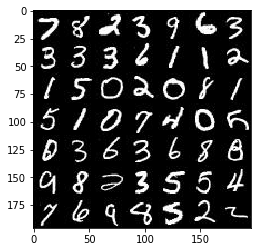

In [36]:
show_n_images = 60

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

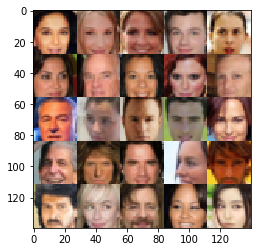

In [37]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [38]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [39]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print(image_width)
    #print(image_height)
    #print(image_channels)
    #print(z_dim)
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='lr')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [40]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #print(images)
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128,5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn3, bn3)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [41]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #print(z)
    #print(out_channel_dim)
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1)
        # 4x4x512 now
    
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid') #MADE SOME CHANGES IN SHAPE
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        #print(x2)
        # 7x7x256 now
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128 now
    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x5 now
    
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [42]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #print(input_real)
    #print(input_z)
    #print(out_channel_dim)
    alpha = 0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_real)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [43]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [52]:
import pickle as pkl

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(50, z_dim))
    samples, losses = [], []
    steps = 0

    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    # Optimizers
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1

                # Get images and rescale to pass to D
                batch_images = batch_images*2
                
                #Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim))

                #Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    gen_samples = sess.run(
                               generator(input_z, data_shape[3], is_train=False),
                               feed_dict={input_z: sample_z})
                    samples.append(gen_samples)
                    _ = show_generator_output(sess, 5, input_z, data_shape[3], data_image_mode)


        #saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)

    return losses, samples
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9767... Generator Loss: 0.6527
Epoch 1/2... Discriminator Loss: 1.2917... Generator Loss: 0.4754
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.2014
Epoch 1/2... Discriminator Loss: 1.2055... Generator Loss: 1.1144
Epoch 1/2... Discriminator Loss: 1.0810... Generator Loss: 0.5738
Epoch 1/2... Discriminator Loss: 0.8672... Generator Loss: 0.9077
Epoch 1/2... Discriminator Loss: 0.3748... Generator Loss: 1.4267
Epoch 1/2... Discriminator Loss: 0.3677... Generator Loss: 1.4927
Epoch 1/2... Discriminator Loss: 0.2203... Generator Loss: 2.6268
Epoch 1/2... Discriminator Loss: 0.3328... Generator Loss: 1.6700


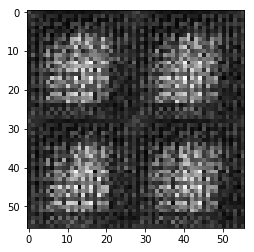

Epoch 1/2... Discriminator Loss: 0.6259... Generator Loss: 0.9440
Epoch 1/2... Discriminator Loss: 0.3531... Generator Loss: 1.7166
Epoch 1/2... Discriminator Loss: 0.1223... Generator Loss: 2.7591
Epoch 1/2... Discriminator Loss: 0.2530... Generator Loss: 1.8086
Epoch 1/2... Discriminator Loss: 0.2464... Generator Loss: 2.1192
Epoch 1/2... Discriminator Loss: 2.9916... Generator Loss: 10.1921
Epoch 1/2... Discriminator Loss: 2.0635... Generator Loss: 0.3106
Epoch 1/2... Discriminator Loss: 0.6268... Generator Loss: 1.4854
Epoch 1/2... Discriminator Loss: 0.5270... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 0.9222... Generator Loss: 0.7040


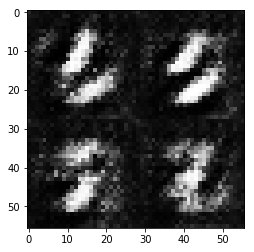

Epoch 1/2... Discriminator Loss: 1.1099... Generator Loss: 0.5616
Epoch 1/2... Discriminator Loss: 0.8776... Generator Loss: 2.8045
Epoch 1/2... Discriminator Loss: 0.7567... Generator Loss: 3.2860
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 1.5238
Epoch 1/2... Discriminator Loss: 0.6811... Generator Loss: 1.1206
Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 0.6157
Epoch 1/2... Discriminator Loss: 1.0168... Generator Loss: 2.3396
Epoch 1/2... Discriminator Loss: 0.6052... Generator Loss: 2.0428
Epoch 1/2... Discriminator Loss: 0.8416... Generator Loss: 1.6983
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 1.2166


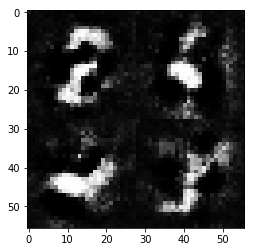

Epoch 1/2... Discriminator Loss: 0.6885... Generator Loss: 1.2782
Epoch 1/2... Discriminator Loss: 0.8070... Generator Loss: 0.9539
Epoch 1/2... Discriminator Loss: 0.9060... Generator Loss: 1.7736
Epoch 1/2... Discriminator Loss: 1.0834... Generator Loss: 0.7205
Epoch 1/2... Discriminator Loss: 0.9982... Generator Loss: 1.1166
Epoch 1/2... Discriminator Loss: 1.4289... Generator Loss: 1.6216
Epoch 1/2... Discriminator Loss: 0.7708... Generator Loss: 1.4990
Epoch 1/2... Discriminator Loss: 1.0820... Generator Loss: 2.3414
Epoch 1/2... Discriminator Loss: 1.1801... Generator Loss: 0.5022
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 0.5857


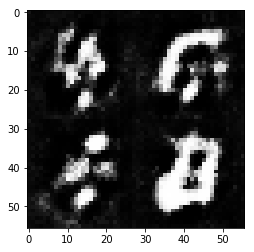

Epoch 1/2... Discriminator Loss: 0.9878... Generator Loss: 0.8060
Epoch 1/2... Discriminator Loss: 1.0227... Generator Loss: 1.1744
Epoch 1/2... Discriminator Loss: 1.4166... Generator Loss: 2.1851
Epoch 1/2... Discriminator Loss: 1.4103... Generator Loss: 0.3559
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 0.7175
Epoch 1/2... Discriminator Loss: 0.8467... Generator Loss: 1.7360
Epoch 1/2... Discriminator Loss: 0.8467... Generator Loss: 1.0010
Epoch 1/2... Discriminator Loss: 0.7510... Generator Loss: 1.1915
Epoch 1/2... Discriminator Loss: 0.8481... Generator Loss: 2.1093
Epoch 1/2... Discriminator Loss: 0.7791... Generator Loss: 1.7698


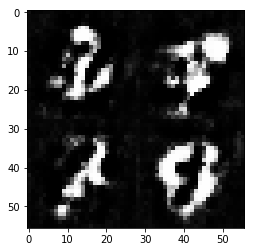

Epoch 1/2... Discriminator Loss: 0.8045... Generator Loss: 1.1661
Epoch 1/2... Discriminator Loss: 1.2134... Generator Loss: 2.3988
Epoch 1/2... Discriminator Loss: 1.2947... Generator Loss: 0.4003
Epoch 1/2... Discriminator Loss: 0.6789... Generator Loss: 1.3525
Epoch 1/2... Discriminator Loss: 0.7542... Generator Loss: 1.2059
Epoch 1/2... Discriminator Loss: 0.7619... Generator Loss: 1.2451
Epoch 1/2... Discriminator Loss: 0.8508... Generator Loss: 0.9225
Epoch 1/2... Discriminator Loss: 1.0893... Generator Loss: 0.5720
Epoch 1/2... Discriminator Loss: 0.8659... Generator Loss: 0.8006
Epoch 1/2... Discriminator Loss: 0.9184... Generator Loss: 1.9779


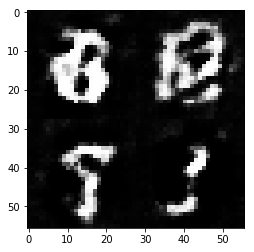

Epoch 1/2... Discriminator Loss: 0.7722... Generator Loss: 0.9153
Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 0.5734
Epoch 1/2... Discriminator Loss: 0.7744... Generator Loss: 2.4134
Epoch 1/2... Discriminator Loss: 0.7300... Generator Loss: 0.9140
Epoch 1/2... Discriminator Loss: 0.8597... Generator Loss: 1.0042
Epoch 1/2... Discriminator Loss: 0.7607... Generator Loss: 0.9605
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 1.2438
Epoch 1/2... Discriminator Loss: 0.7730... Generator Loss: 1.1712
Epoch 1/2... Discriminator Loss: 0.8341... Generator Loss: 1.6603
Epoch 1/2... Discriminator Loss: 0.7851... Generator Loss: 0.9779


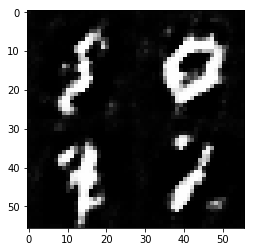

Epoch 1/2... Discriminator Loss: 0.7839... Generator Loss: 1.9593
Epoch 1/2... Discriminator Loss: 1.1653... Generator Loss: 0.4720
Epoch 1/2... Discriminator Loss: 0.8027... Generator Loss: 1.1075
Epoch 1/2... Discriminator Loss: 1.1890... Generator Loss: 0.4783
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 0.5957
Epoch 1/2... Discriminator Loss: 0.7863... Generator Loss: 0.9081
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 0.7438
Epoch 1/2... Discriminator Loss: 1.3114... Generator Loss: 0.4507
Epoch 1/2... Discriminator Loss: 0.8111... Generator Loss: 0.9563
Epoch 1/2... Discriminator Loss: 0.8635... Generator Loss: 1.0828


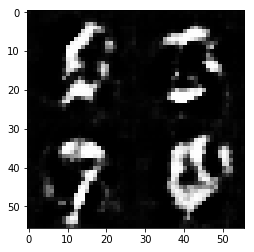

Epoch 1/2... Discriminator Loss: 0.9535... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 0.7847... Generator Loss: 0.8854
Epoch 1/2... Discriminator Loss: 1.6652... Generator Loss: 0.2650
Epoch 1/2... Discriminator Loss: 1.3116... Generator Loss: 0.4308
Epoch 1/2... Discriminator Loss: 0.8951... Generator Loss: 1.5694
Epoch 1/2... Discriminator Loss: 1.6653... Generator Loss: 0.2705
Epoch 1/2... Discriminator Loss: 0.7702... Generator Loss: 0.8899
Epoch 1/2... Discriminator Loss: 0.7179... Generator Loss: 1.6578
Epoch 1/2... Discriminator Loss: 0.8782... Generator Loss: 0.7165
Epoch 1/2... Discriminator Loss: 0.6524... Generator Loss: 1.1521


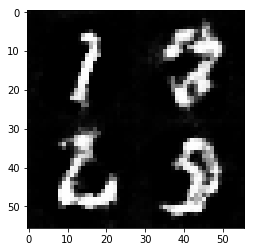

Epoch 1/2... Discriminator Loss: 0.5854... Generator Loss: 1.7019
Epoch 1/2... Discriminator Loss: 0.9959... Generator Loss: 0.6500
Epoch 1/2... Discriminator Loss: 0.8893... Generator Loss: 0.9587
Epoch 1/2... Discriminator Loss: 0.5855... Generator Loss: 1.2540
Epoch 1/2... Discriminator Loss: 0.8607... Generator Loss: 0.7862
Epoch 1/2... Discriminator Loss: 1.1577... Generator Loss: 0.5200
Epoch 1/2... Discriminator Loss: 1.2933... Generator Loss: 0.4724
Epoch 1/2... Discriminator Loss: 0.9745... Generator Loss: 0.6918
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 0.4020
Epoch 1/2... Discriminator Loss: 1.0457... Generator Loss: 0.5993


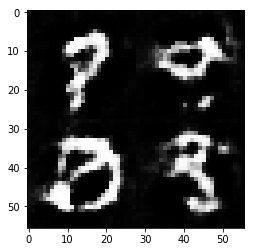

Epoch 1/2... Discriminator Loss: 0.7394... Generator Loss: 1.0261
Epoch 1/2... Discriminator Loss: 1.7981... Generator Loss: 0.2674
Epoch 1/2... Discriminator Loss: 0.6398... Generator Loss: 1.1886
Epoch 1/2... Discriminator Loss: 0.9553... Generator Loss: 0.6480
Epoch 1/2... Discriminator Loss: 0.9102... Generator Loss: 1.7281
Epoch 1/2... Discriminator Loss: 0.7176... Generator Loss: 0.9196
Epoch 1/2... Discriminator Loss: 1.4606... Generator Loss: 0.3872
Epoch 1/2... Discriminator Loss: 0.8219... Generator Loss: 0.8291
Epoch 1/2... Discriminator Loss: 1.2353... Generator Loss: 0.4969
Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 0.4595


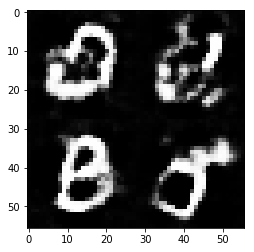

Epoch 1/2... Discriminator Loss: 1.7538... Generator Loss: 0.2772
Epoch 1/2... Discriminator Loss: 1.3342... Generator Loss: 0.4251
Epoch 1/2... Discriminator Loss: 1.7696... Generator Loss: 0.2404
Epoch 1/2... Discriminator Loss: 0.9823... Generator Loss: 3.1964
Epoch 1/2... Discriminator Loss: 0.7097... Generator Loss: 1.5904
Epoch 1/2... Discriminator Loss: 1.1087... Generator Loss: 0.5360
Epoch 1/2... Discriminator Loss: 0.7647... Generator Loss: 2.0812
Epoch 1/2... Discriminator Loss: 1.0992... Generator Loss: 1.9156
Epoch 1/2... Discriminator Loss: 1.0927... Generator Loss: 0.5378
Epoch 1/2... Discriminator Loss: 0.8937... Generator Loss: 0.6873


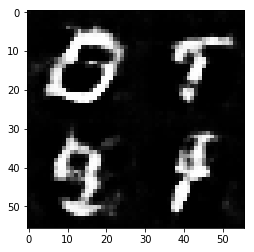

Epoch 1/2... Discriminator Loss: 0.6616... Generator Loss: 1.2699
Epoch 1/2... Discriminator Loss: 1.7811... Generator Loss: 0.2429
Epoch 1/2... Discriminator Loss: 1.0231... Generator Loss: 0.5653
Epoch 1/2... Discriminator Loss: 0.5791... Generator Loss: 1.1406
Epoch 1/2... Discriminator Loss: 0.9737... Generator Loss: 0.7282
Epoch 1/2... Discriminator Loss: 1.4512... Generator Loss: 0.3366
Epoch 1/2... Discriminator Loss: 0.7245... Generator Loss: 1.0775
Epoch 1/2... Discriminator Loss: 0.6306... Generator Loss: 1.0162
Epoch 1/2... Discriminator Loss: 1.8837... Generator Loss: 0.2363
Epoch 1/2... Discriminator Loss: 0.6682... Generator Loss: 1.9008


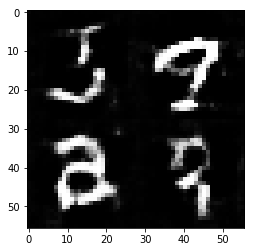

Epoch 1/2... Discriminator Loss: 1.5802... Generator Loss: 0.3255
Epoch 1/2... Discriminator Loss: 0.8228... Generator Loss: 0.9251
Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 0.6817
Epoch 1/2... Discriminator Loss: 0.9024... Generator Loss: 0.7291
Epoch 1/2... Discriminator Loss: 1.0994... Generator Loss: 0.5495
Epoch 1/2... Discriminator Loss: 1.7735... Generator Loss: 0.2341
Epoch 1/2... Discriminator Loss: 0.7534... Generator Loss: 0.9008
Epoch 1/2... Discriminator Loss: 0.7100... Generator Loss: 0.9720
Epoch 1/2... Discriminator Loss: 1.4781... Generator Loss: 0.3376
Epoch 1/2... Discriminator Loss: 1.2827... Generator Loss: 0.4014


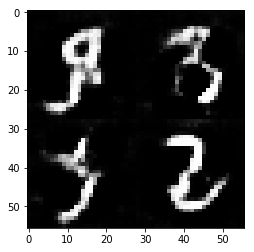

Epoch 1/2... Discriminator Loss: 0.6301... Generator Loss: 1.1803
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 1.9058
Epoch 1/2... Discriminator Loss: 0.9307... Generator Loss: 0.6546
Epoch 1/2... Discriminator Loss: 0.9242... Generator Loss: 0.7018
Epoch 1/2... Discriminator Loss: 1.6948... Generator Loss: 0.2984
Epoch 1/2... Discriminator Loss: 1.1258... Generator Loss: 0.4710
Epoch 1/2... Discriminator Loss: 0.7184... Generator Loss: 1.5185
Epoch 1/2... Discriminator Loss: 1.3731... Generator Loss: 0.4334
Epoch 1/2... Discriminator Loss: 1.3904... Generator Loss: 0.3575
Epoch 1/2... Discriminator Loss: 0.7226... Generator Loss: 1.0522


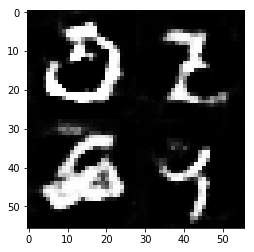

Epoch 1/2... Discriminator Loss: 0.6108... Generator Loss: 1.1425
Epoch 1/2... Discriminator Loss: 0.9900... Generator Loss: 0.6035
Epoch 1/2... Discriminator Loss: 1.4211... Generator Loss: 0.3570
Epoch 1/2... Discriminator Loss: 0.8981... Generator Loss: 0.7916
Epoch 1/2... Discriminator Loss: 2.1759... Generator Loss: 0.1492
Epoch 1/2... Discriminator Loss: 0.6123... Generator Loss: 1.2530
Epoch 1/2... Discriminator Loss: 0.8024... Generator Loss: 0.7594
Epoch 1/2... Discriminator Loss: 1.2274... Generator Loss: 0.4638
Epoch 1/2... Discriminator Loss: 1.4098... Generator Loss: 0.4222
Epoch 1/2... Discriminator Loss: 0.9295... Generator Loss: 0.7605


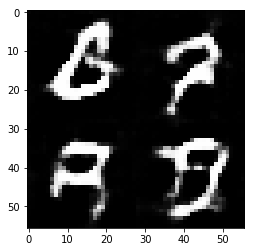

Epoch 1/2... Discriminator Loss: 0.7625... Generator Loss: 0.8685
Epoch 1/2... Discriminator Loss: 1.2959... Generator Loss: 0.4402
Epoch 1/2... Discriminator Loss: 1.5129... Generator Loss: 0.3242
Epoch 1/2... Discriminator Loss: 1.0441... Generator Loss: 0.5756
Epoch 1/2... Discriminator Loss: 1.5629... Generator Loss: 0.3538
Epoch 1/2... Discriminator Loss: 3.2727... Generator Loss: 5.3223
Epoch 1/2... Discriminator Loss: 0.8787... Generator Loss: 0.8148
Epoch 1/2... Discriminator Loss: 0.9800... Generator Loss: 0.6749
Epoch 1/2... Discriminator Loss: 0.7743... Generator Loss: 0.8520
Epoch 1/2... Discriminator Loss: 0.7856... Generator Loss: 0.9137


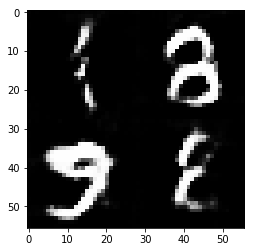

Epoch 1/2... Discriminator Loss: 0.4703... Generator Loss: 1.3045
Epoch 1/2... Discriminator Loss: 0.6683... Generator Loss: 1.0484
Epoch 1/2... Discriminator Loss: 0.9384... Generator Loss: 0.6664
Epoch 1/2... Discriminator Loss: 1.0627... Generator Loss: 0.6060
Epoch 1/2... Discriminator Loss: 0.6308... Generator Loss: 1.2940
Epoch 1/2... Discriminator Loss: 0.7931... Generator Loss: 2.4686
Epoch 1/2... Discriminator Loss: 0.6329... Generator Loss: 1.2239
Epoch 1/2... Discriminator Loss: 0.9196... Generator Loss: 0.7745
Epoch 1/2... Discriminator Loss: 0.9713... Generator Loss: 0.6900
Epoch 1/2... Discriminator Loss: 1.9104... Generator Loss: 0.2485


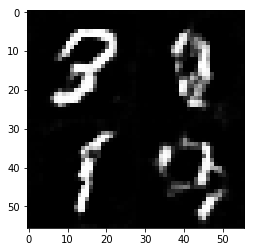

Epoch 1/2... Discriminator Loss: 0.6979... Generator Loss: 0.9886
Epoch 1/2... Discriminator Loss: 0.9474... Generator Loss: 0.7123
Epoch 1/2... Discriminator Loss: 1.2534... Generator Loss: 0.5236
Epoch 1/2... Discriminator Loss: 0.8155... Generator Loss: 0.9064
Epoch 1/2... Discriminator Loss: 0.5206... Generator Loss: 1.2698
Epoch 1/2... Discriminator Loss: 1.6255... Generator Loss: 0.3032
Epoch 1/2... Discriminator Loss: 0.6952... Generator Loss: 1.8842
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 0.7073
Epoch 2/2... Discriminator Loss: 1.0683... Generator Loss: 0.5808
Epoch 2/2... Discriminator Loss: 0.6591... Generator Loss: 0.9927


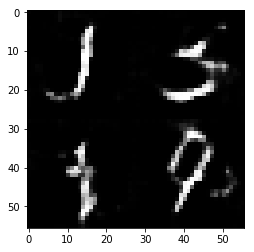

Epoch 2/2... Discriminator Loss: 0.8788... Generator Loss: 0.8062
Epoch 2/2... Discriminator Loss: 0.4799... Generator Loss: 1.4372
Epoch 2/2... Discriminator Loss: 0.8244... Generator Loss: 0.7646
Epoch 2/2... Discriminator Loss: 0.7148... Generator Loss: 0.9562
Epoch 2/2... Discriminator Loss: 0.7876... Generator Loss: 0.7629
Epoch 2/2... Discriminator Loss: 0.5240... Generator Loss: 1.2657
Epoch 2/2... Discriminator Loss: 0.8714... Generator Loss: 0.7120
Epoch 2/2... Discriminator Loss: 0.7473... Generator Loss: 0.9649
Epoch 2/2... Discriminator Loss: 0.5878... Generator Loss: 1.1848
Epoch 2/2... Discriminator Loss: 0.8173... Generator Loss: 0.8052


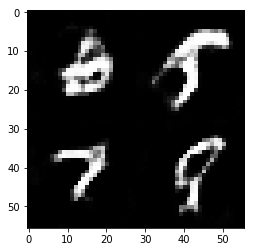

Epoch 2/2... Discriminator Loss: 1.6132... Generator Loss: 0.3519
Epoch 2/2... Discriminator Loss: 0.5426... Generator Loss: 1.1074
Epoch 2/2... Discriminator Loss: 2.6485... Generator Loss: 0.1581
Epoch 2/2... Discriminator Loss: 0.4345... Generator Loss: 1.4311
Epoch 2/2... Discriminator Loss: 1.8622... Generator Loss: 0.2718
Epoch 2/2... Discriminator Loss: 1.2169... Generator Loss: 0.4576
Epoch 2/2... Discriminator Loss: 0.6109... Generator Loss: 1.0780
Epoch 2/2... Discriminator Loss: 1.2288... Generator Loss: 0.4866
Epoch 2/2... Discriminator Loss: 1.1480... Generator Loss: 0.5114
Epoch 2/2... Discriminator Loss: 0.9664... Generator Loss: 0.7087


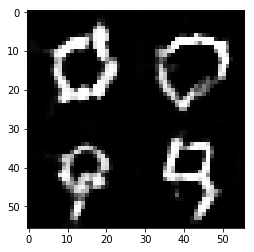

Epoch 2/2... Discriminator Loss: 0.5099... Generator Loss: 1.3200
Epoch 2/2... Discriminator Loss: 0.9385... Generator Loss: 0.7053
Epoch 2/2... Discriminator Loss: 0.8396... Generator Loss: 0.8513
Epoch 2/2... Discriminator Loss: 1.2232... Generator Loss: 0.4786
Epoch 2/2... Discriminator Loss: 0.7240... Generator Loss: 0.9215
Epoch 2/2... Discriminator Loss: 0.6996... Generator Loss: 1.0088
Epoch 2/2... Discriminator Loss: 1.0723... Generator Loss: 0.5830
Epoch 2/2... Discriminator Loss: 1.4438... Generator Loss: 0.3696
Epoch 2/2... Discriminator Loss: 1.5623... Generator Loss: 4.6819
Epoch 2/2... Discriminator Loss: 0.7359... Generator Loss: 1.3867


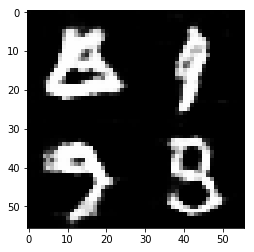

Epoch 2/2... Discriminator Loss: 0.5949... Generator Loss: 1.3728
Epoch 2/2... Discriminator Loss: 0.7192... Generator Loss: 0.9173
Epoch 2/2... Discriminator Loss: 1.3974... Generator Loss: 0.4013
Epoch 2/2... Discriminator Loss: 0.7838... Generator Loss: 0.8816
Epoch 2/2... Discriminator Loss: 0.5787... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 0.6361... Generator Loss: 0.9597
Epoch 2/2... Discriminator Loss: 0.5663... Generator Loss: 1.1200
Epoch 2/2... Discriminator Loss: 0.5960... Generator Loss: 1.0488
Epoch 2/2... Discriminator Loss: 0.4759... Generator Loss: 1.2692
Epoch 2/2... Discriminator Loss: 0.7170... Generator Loss: 0.8899


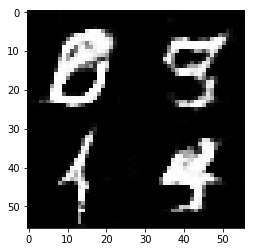

Epoch 2/2... Discriminator Loss: 0.9152... Generator Loss: 0.7128
Epoch 2/2... Discriminator Loss: 0.5366... Generator Loss: 1.3040
Epoch 2/2... Discriminator Loss: 0.9458... Generator Loss: 0.6261
Epoch 2/2... Discriminator Loss: 0.4783... Generator Loss: 1.2867
Epoch 2/2... Discriminator Loss: 0.4022... Generator Loss: 1.6732
Epoch 2/2... Discriminator Loss: 1.1595... Generator Loss: 0.5379
Epoch 2/2... Discriminator Loss: 0.4915... Generator Loss: 1.3267
Epoch 2/2... Discriminator Loss: 1.0455... Generator Loss: 0.5937
Epoch 2/2... Discriminator Loss: 0.6339... Generator Loss: 1.1177
Epoch 2/2... Discriminator Loss: 0.4925... Generator Loss: 1.3570


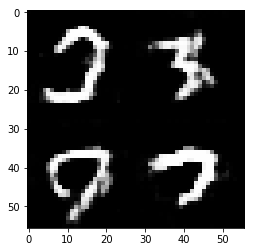

Epoch 2/2... Discriminator Loss: 1.4775... Generator Loss: 0.3777
Epoch 2/2... Discriminator Loss: 0.8036... Generator Loss: 0.8115
Epoch 2/2... Discriminator Loss: 0.8555... Generator Loss: 0.7159
Epoch 2/2... Discriminator Loss: 0.6937... Generator Loss: 1.0054
Epoch 2/2... Discriminator Loss: 0.5498... Generator Loss: 1.0884
Epoch 2/2... Discriminator Loss: 1.2687... Generator Loss: 0.5146
Epoch 2/2... Discriminator Loss: 0.4948... Generator Loss: 1.2277
Epoch 2/2... Discriminator Loss: 0.5322... Generator Loss: 1.2009
Epoch 2/2... Discriminator Loss: 0.6466... Generator Loss: 0.9757
Epoch 2/2... Discriminator Loss: 0.5646... Generator Loss: 1.1570


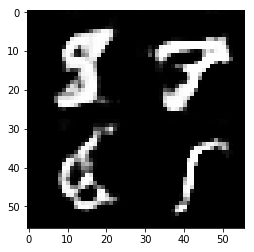

Epoch 2/2... Discriminator Loss: 0.8209... Generator Loss: 0.7936
Epoch 2/2... Discriminator Loss: 0.4830... Generator Loss: 1.2731
Epoch 2/2... Discriminator Loss: 0.8877... Generator Loss: 0.7766
Epoch 2/2... Discriminator Loss: 0.6797... Generator Loss: 0.8536
Epoch 2/2... Discriminator Loss: 1.1964... Generator Loss: 0.4492
Epoch 2/2... Discriminator Loss: 0.6603... Generator Loss: 1.0233
Epoch 2/2... Discriminator Loss: 0.4527... Generator Loss: 1.3583
Epoch 2/2... Discriminator Loss: 0.7128... Generator Loss: 0.9982
Epoch 2/2... Discriminator Loss: 1.6512... Generator Loss: 0.3211
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 0.7753


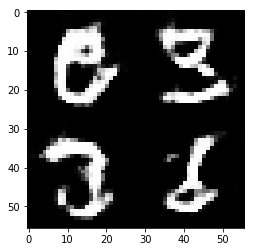

Epoch 2/2... Discriminator Loss: 0.3232... Generator Loss: 1.7001
Epoch 2/2... Discriminator Loss: 0.6746... Generator Loss: 0.9994
Epoch 2/2... Discriminator Loss: 0.6553... Generator Loss: 1.1009
Epoch 2/2... Discriminator Loss: 0.4869... Generator Loss: 1.3182
Epoch 2/2... Discriminator Loss: 0.8710... Generator Loss: 0.7459
Epoch 2/2... Discriminator Loss: 0.6891... Generator Loss: 0.9113
Epoch 2/2... Discriminator Loss: 0.9339... Generator Loss: 0.6737
Epoch 2/2... Discriminator Loss: 0.5139... Generator Loss: 1.1240
Epoch 2/2... Discriminator Loss: 0.6669... Generator Loss: 1.0777
Epoch 2/2... Discriminator Loss: 0.3537... Generator Loss: 1.6617


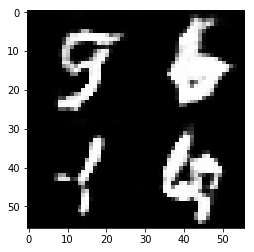

Epoch 2/2... Discriminator Loss: 0.7986... Generator Loss: 0.8865
Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.5316
Epoch 2/2... Discriminator Loss: 1.1814... Generator Loss: 0.5688
Epoch 2/2... Discriminator Loss: 1.5595... Generator Loss: 0.3579
Epoch 2/2... Discriminator Loss: 0.4719... Generator Loss: 1.3212
Epoch 2/2... Discriminator Loss: 0.3526... Generator Loss: 1.5460
Epoch 2/2... Discriminator Loss: 0.7427... Generator Loss: 0.8249
Epoch 2/2... Discriminator Loss: 0.6635... Generator Loss: 0.9145
Epoch 2/2... Discriminator Loss: 0.3679... Generator Loss: 1.6564
Epoch 2/2... Discriminator Loss: 0.8082... Generator Loss: 0.8912


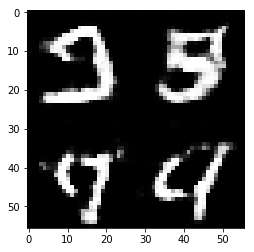

Epoch 2/2... Discriminator Loss: 1.2495... Generator Loss: 0.4405
Epoch 2/2... Discriminator Loss: 0.4814... Generator Loss: 1.2592
Epoch 2/2... Discriminator Loss: 0.3460... Generator Loss: 1.7707
Epoch 2/2... Discriminator Loss: 0.7991... Generator Loss: 0.8056
Epoch 2/2... Discriminator Loss: 0.5540... Generator Loss: 1.1069
Epoch 2/2... Discriminator Loss: 0.6213... Generator Loss: 1.0531
Epoch 2/2... Discriminator Loss: 0.9752... Generator Loss: 0.6432
Epoch 2/2... Discriminator Loss: 1.4467... Generator Loss: 0.3976
Epoch 2/2... Discriminator Loss: 0.5455... Generator Loss: 1.1671
Epoch 2/2... Discriminator Loss: 0.3329... Generator Loss: 1.6368


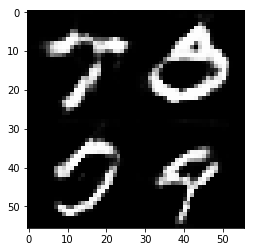

Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 0.9036
Epoch 2/2... Discriminator Loss: 0.4182... Generator Loss: 1.3097
Epoch 2/2... Discriminator Loss: 0.6124... Generator Loss: 1.0711
Epoch 2/2... Discriminator Loss: 0.6755... Generator Loss: 0.9227
Epoch 2/2... Discriminator Loss: 0.5774... Generator Loss: 1.0849
Epoch 2/2... Discriminator Loss: 0.7106... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 0.5426... Generator Loss: 1.2579
Epoch 2/2... Discriminator Loss: 0.5233... Generator Loss: 1.1971
Epoch 2/2... Discriminator Loss: 0.3527... Generator Loss: 1.6176
Epoch 2/2... Discriminator Loss: 0.5217... Generator Loss: 1.1328


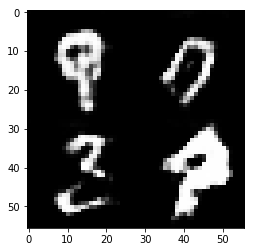

Epoch 2/2... Discriminator Loss: 0.4088... Generator Loss: 1.3857
Epoch 2/2... Discriminator Loss: 0.5643... Generator Loss: 1.1083
Epoch 2/2... Discriminator Loss: 0.5481... Generator Loss: 1.2072
Epoch 2/2... Discriminator Loss: 0.9304... Generator Loss: 0.7470
Epoch 2/2... Discriminator Loss: 1.0565... Generator Loss: 0.6829
Epoch 2/2... Discriminator Loss: 0.4302... Generator Loss: 1.2854
Epoch 2/2... Discriminator Loss: 2.5385... Generator Loss: 0.1464
Epoch 2/2... Discriminator Loss: 0.9151... Generator Loss: 0.7674
Epoch 2/2... Discriminator Loss: 0.7205... Generator Loss: 0.8834
Epoch 2/2... Discriminator Loss: 0.5735... Generator Loss: 1.0799


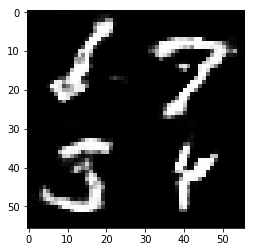

Epoch 2/2... Discriminator Loss: 0.3669... Generator Loss: 1.5110
Epoch 2/2... Discriminator Loss: 0.6422... Generator Loss: 1.1361
Epoch 2/2... Discriminator Loss: 0.6203... Generator Loss: 0.9820
Epoch 2/2... Discriminator Loss: 0.9498... Generator Loss: 0.6321
Epoch 2/2... Discriminator Loss: 0.8963... Generator Loss: 0.8194
Epoch 2/2... Discriminator Loss: 0.6636... Generator Loss: 1.0327
Epoch 2/2... Discriminator Loss: 0.7966... Generator Loss: 0.7887
Epoch 2/2... Discriminator Loss: 0.2635... Generator Loss: 1.9479
Epoch 2/2... Discriminator Loss: 1.2953... Generator Loss: 2.2442
Epoch 2/2... Discriminator Loss: 1.0802... Generator Loss: 0.6238


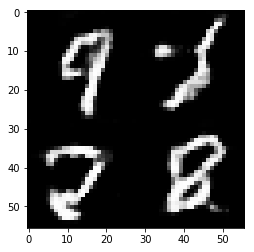

Epoch 2/2... Discriminator Loss: 0.6876... Generator Loss: 1.3362
Epoch 2/2... Discriminator Loss: 1.1465... Generator Loss: 0.6022
Epoch 2/2... Discriminator Loss: 0.6758... Generator Loss: 2.8835
Epoch 2/2... Discriminator Loss: 0.4076... Generator Loss: 1.5612
Epoch 2/2... Discriminator Loss: 0.3701... Generator Loss: 1.7835
Epoch 2/2... Discriminator Loss: 0.5743... Generator Loss: 1.3154
Epoch 2/2... Discriminator Loss: 0.6952... Generator Loss: 0.8481
Epoch 2/2... Discriminator Loss: 0.2965... Generator Loss: 2.1370
Epoch 2/2... Discriminator Loss: 0.4262... Generator Loss: 1.4269
Epoch 2/2... Discriminator Loss: 0.5056... Generator Loss: 1.2773


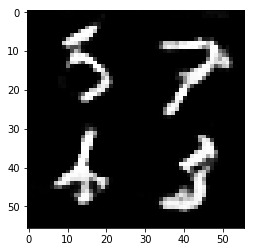

Epoch 2/2... Discriminator Loss: 0.5378... Generator Loss: 1.1741
Epoch 2/2... Discriminator Loss: 0.3610... Generator Loss: 1.5707
Epoch 2/2... Discriminator Loss: 0.6927... Generator Loss: 0.9335
Epoch 2/2... Discriminator Loss: 0.4466... Generator Loss: 1.3760
Epoch 2/2... Discriminator Loss: 0.6937... Generator Loss: 1.0325
Epoch 2/2... Discriminator Loss: 0.6422... Generator Loss: 1.0914
Epoch 2/2... Discriminator Loss: 0.3943... Generator Loss: 1.3195
Epoch 2/2... Discriminator Loss: 0.6328... Generator Loss: 0.9959
Epoch 2/2... Discriminator Loss: 0.3106... Generator Loss: 1.7624
Epoch 2/2... Discriminator Loss: 0.5263... Generator Loss: 1.2740


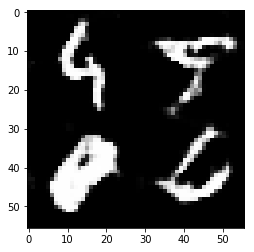

Epoch 2/2... Discriminator Loss: 0.5695... Generator Loss: 1.0579
Epoch 2/2... Discriminator Loss: 0.5844... Generator Loss: 1.1143
Epoch 2/2... Discriminator Loss: 0.5340... Generator Loss: 1.1379
Epoch 2/2... Discriminator Loss: 0.5314... Generator Loss: 1.2442
Epoch 2/2... Discriminator Loss: 0.9727... Generator Loss: 0.6730
Epoch 2/2... Discriminator Loss: 0.4246... Generator Loss: 1.4163
Epoch 2/2... Discriminator Loss: 0.4548... Generator Loss: 1.3158
Epoch 2/2... Discriminator Loss: 0.4777... Generator Loss: 1.3955
Epoch 2/2... Discriminator Loss: 0.1552... Generator Loss: 2.3568
Epoch 2/2... Discriminator Loss: 0.3755... Generator Loss: 1.6086


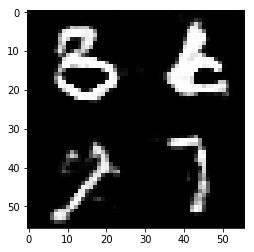

Epoch 2/2... Discriminator Loss: 0.4327... Generator Loss: 1.4196
Epoch 2/2... Discriminator Loss: 0.4364... Generator Loss: 1.3158
Epoch 2/2... Discriminator Loss: 0.9445... Generator Loss: 0.7685
Epoch 2/2... Discriminator Loss: 0.6477... Generator Loss: 1.0431
Epoch 2/2... Discriminator Loss: 0.3674... Generator Loss: 1.5933
Epoch 2/2... Discriminator Loss: 0.7830... Generator Loss: 0.8441
Epoch 2/2... Discriminator Loss: 0.4585... Generator Loss: 1.3491
Epoch 2/2... Discriminator Loss: 0.4241... Generator Loss: 1.3063
Epoch 2/2... Discriminator Loss: 0.5528... Generator Loss: 1.2790
Epoch 2/2... Discriminator Loss: 0.3869... Generator Loss: 1.5169


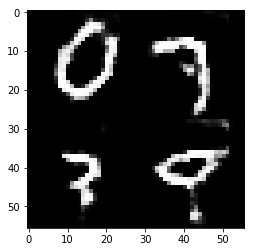

Epoch 2/2... Discriminator Loss: 1.1938... Generator Loss: 0.6319
Epoch 2/2... Discriminator Loss: 0.6138... Generator Loss: 1.0636
Epoch 2/2... Discriminator Loss: 7.7853... Generator Loss: 11.9975
Epoch 2/2... Discriminator Loss: 2.2168... Generator Loss: 0.1761
Epoch 2/2... Discriminator Loss: 1.5213... Generator Loss: 0.3661
Epoch 2/2... Discriminator Loss: 0.7077... Generator Loss: 1.0849
Epoch 2/2... Discriminator Loss: 0.5167... Generator Loss: 1.1419
Epoch 2/2... Discriminator Loss: 0.5128... Generator Loss: 1.3741
Epoch 2/2... Discriminator Loss: 0.4488... Generator Loss: 1.2835
Epoch 2/2... Discriminator Loss: 0.5321... Generator Loss: 1.1403


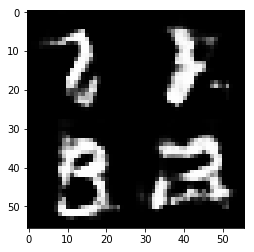

Epoch 2/2... Discriminator Loss: 0.6189... Generator Loss: 1.1007
Epoch 2/2... Discriminator Loss: 0.4074... Generator Loss: 1.4256
Epoch 2/2... Discriminator Loss: 0.7694... Generator Loss: 0.8599
Epoch 2/2... Discriminator Loss: 0.6730... Generator Loss: 0.9376
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.0883


In [54]:
batch_size = 32
z_dim = 500
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.4434
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.5389
Epoch 1/1... Discriminator Loss: 0.6443... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 0.2725... Generator Loss: 1.8680
Epoch 1/1... Discriminator Loss: 0.1238... Generator Loss: 3.8755
Epoch 1/1... Discriminator Loss: 0.3592... Generator Loss: 1.4015
Epoch 1/1... Discriminator Loss: 0.2876... Generator Loss: 1.6443
Epoch 1/1... Discriminator Loss: 1.7628... Generator Loss: 0.2447
Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 1.5378
Epoch 1/1... Discriminator Loss: 0.2979... Generator Loss: 1.8673


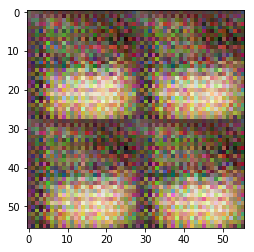

Epoch 1/1... Discriminator Loss: 0.3300... Generator Loss: 1.4283
Epoch 1/1... Discriminator Loss: 0.4068... Generator Loss: 1.4247
Epoch 1/1... Discriminator Loss: 0.6160... Generator Loss: 1.3301
Epoch 1/1... Discriminator Loss: 0.1885... Generator Loss: 2.5162
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 12.0804
Epoch 1/1... Discriminator Loss: 0.0613... Generator Loss: 3.3347
Epoch 1/1... Discriminator Loss: 0.1475... Generator Loss: 2.3208
Epoch 1/1... Discriminator Loss: 0.1649... Generator Loss: 2.6486
Epoch 1/1... Discriminator Loss: 0.2172... Generator Loss: 2.2676
Epoch 1/1... Discriminator Loss: 0.2292... Generator Loss: 2.1651


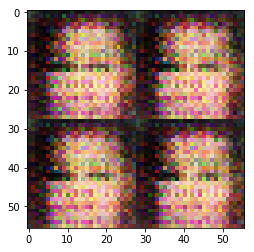

Epoch 1/1... Discriminator Loss: 0.5372... Generator Loss: 1.0468
Epoch 1/1... Discriminator Loss: 0.2614... Generator Loss: 1.8699
Epoch 1/1... Discriminator Loss: 0.1820... Generator Loss: 2.4455
Epoch 1/1... Discriminator Loss: 0.1337... Generator Loss: 2.7125
Epoch 1/1... Discriminator Loss: 0.1674... Generator Loss: 2.7580
Epoch 1/1... Discriminator Loss: 0.1986... Generator Loss: 2.1058
Epoch 1/1... Discriminator Loss: 0.0978... Generator Loss: 2.8614
Epoch 1/1... Discriminator Loss: 0.1325... Generator Loss: 3.0731
Epoch 1/1... Discriminator Loss: 0.1627... Generator Loss: 2.2208
Epoch 1/1... Discriminator Loss: 0.0893... Generator Loss: 2.9107


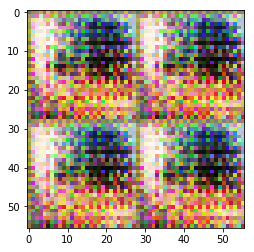

Epoch 1/1... Discriminator Loss: 0.0984... Generator Loss: 2.7905
Epoch 1/1... Discriminator Loss: 0.1252... Generator Loss: 2.6226
Epoch 1/1... Discriminator Loss: 0.0962... Generator Loss: 3.1893
Epoch 1/1... Discriminator Loss: 0.0711... Generator Loss: 3.1290
Epoch 1/1... Discriminator Loss: 0.0591... Generator Loss: 3.5063
Epoch 1/1... Discriminator Loss: 0.0744... Generator Loss: 3.3216
Epoch 1/1... Discriminator Loss: 0.1112... Generator Loss: 2.7209
Epoch 1/1... Discriminator Loss: 0.1572... Generator Loss: 2.5664
Epoch 1/1... Discriminator Loss: 0.1259... Generator Loss: 7.3280
Epoch 1/1... Discriminator Loss: 0.1829... Generator Loss: 2.5172


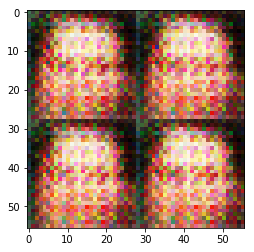

Epoch 1/1... Discriminator Loss: 0.0422... Generator Loss: 4.0413
Epoch 1/1... Discriminator Loss: 0.0939... Generator Loss: 5.2069
Epoch 1/1... Discriminator Loss: 0.0834... Generator Loss: 3.0892
Epoch 1/1... Discriminator Loss: 0.0725... Generator Loss: 3.4084
Epoch 1/1... Discriminator Loss: 0.1048... Generator Loss: 2.8656
Epoch 1/1... Discriminator Loss: 0.0867... Generator Loss: 3.2609
Epoch 1/1... Discriminator Loss: 0.0581... Generator Loss: 3.4367
Epoch 1/1... Discriminator Loss: 0.1091... Generator Loss: 2.8276
Epoch 1/1... Discriminator Loss: 0.1037... Generator Loss: 2.7862
Epoch 1/1... Discriminator Loss: 0.0594... Generator Loss: 3.5840


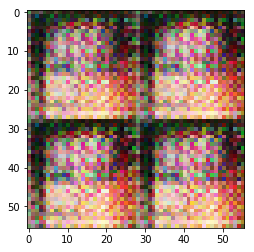

Epoch 1/1... Discriminator Loss: 0.0597... Generator Loss: 3.3786
Epoch 1/1... Discriminator Loss: 0.0467... Generator Loss: 3.7510
Epoch 1/1... Discriminator Loss: 0.0981... Generator Loss: 2.8105
Epoch 1/1... Discriminator Loss: 0.0486... Generator Loss: 3.7642
Epoch 1/1... Discriminator Loss: 0.0701... Generator Loss: 3.3065
Epoch 1/1... Discriminator Loss: 0.0436... Generator Loss: 3.7290
Epoch 1/1... Discriminator Loss: 0.0444... Generator Loss: 3.3984
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 3.7673
Epoch 1/1... Discriminator Loss: 0.0392... Generator Loss: 3.9157
Epoch 1/1... Discriminator Loss: 0.0583... Generator Loss: 3.2299


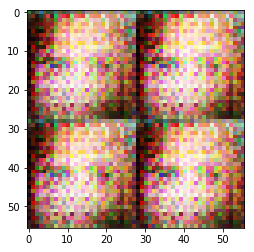

Epoch 1/1... Discriminator Loss: 0.0571... Generator Loss: 3.7078
Epoch 1/1... Discriminator Loss: 0.0543... Generator Loss: 3.7757
Epoch 1/1... Discriminator Loss: 0.3336... Generator Loss: 1.4693
Epoch 1/1... Discriminator Loss: 4.1545... Generator Loss: 9.4890
Epoch 1/1... Discriminator Loss: 0.6509... Generator Loss: 1.0446
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 1.4204
Epoch 1/1... Discriminator Loss: 0.1844... Generator Loss: 3.0211
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.3123
Epoch 1/1... Discriminator Loss: 0.1641... Generator Loss: 2.5734
Epoch 1/1... Discriminator Loss: 0.3690... Generator Loss: 1.3111


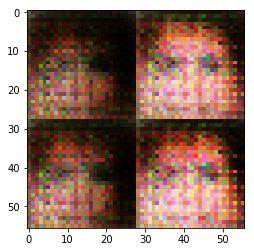

Epoch 1/1... Discriminator Loss: 0.3683... Generator Loss: 1.6679
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 0.2145... Generator Loss: 2.2332
Epoch 1/1... Discriminator Loss: 0.1962... Generator Loss: 2.5522
Epoch 1/1... Discriminator Loss: 0.0874... Generator Loss: 3.5916
Epoch 1/1... Discriminator Loss: 0.7641... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 0.2192... Generator Loss: 2.9625
Epoch 1/1... Discriminator Loss: 0.5119... Generator Loss: 5.8152
Epoch 1/1... Discriminator Loss: 0.3244... Generator Loss: 1.9298
Epoch 1/1... Discriminator Loss: 0.5943... Generator Loss: 1.2870


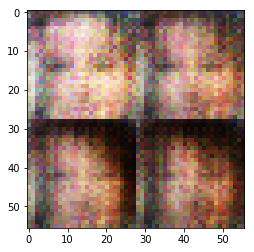

Epoch 1/1... Discriminator Loss: 0.2376... Generator Loss: 3.0678
Epoch 1/1... Discriminator Loss: 0.6936... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 0.2926... Generator Loss: 1.7656
Epoch 1/1... Discriminator Loss: 0.4548... Generator Loss: 2.2624
Epoch 1/1... Discriminator Loss: 0.7955... Generator Loss: 1.0981
Epoch 1/1... Discriminator Loss: 0.9008... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 0.9019... Generator Loss: 1.5650
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.5967
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 0.4224... Generator Loss: 1.4961


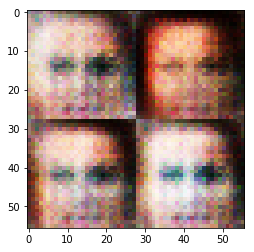

Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 3.9588
Epoch 1/1... Discriminator Loss: 0.5610... Generator Loss: 2.7885
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 1.1573
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.1663
Epoch 1/1... Discriminator Loss: 0.4969... Generator Loss: 1.6687
Epoch 1/1... Discriminator Loss: 1.0142... Generator Loss: 0.7561
Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.0786
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.5308


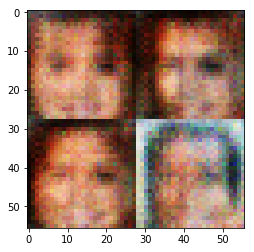

Epoch 1/1... Discriminator Loss: 0.7258... Generator Loss: 2.6682
Epoch 1/1... Discriminator Loss: 2.1237... Generator Loss: 0.2614
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.9227
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.0662... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 0.8329
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.4742
Epoch 1/1... Discriminator Loss: 1.4500... Generator Loss: 0.4319
Epoch 1/1... Discriminator Loss: 0.6786... Generator Loss: 1.2292
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 0.7928


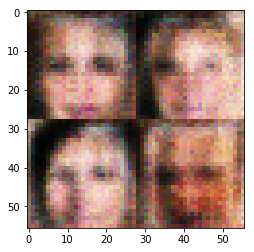

Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.5923
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 1.5163... Generator Loss: 0.3273
Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 0.6936... Generator Loss: 1.2789
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 0.6044
Epoch 1/1... Discriminator Loss: 0.5265... Generator Loss: 1.6958
Epoch 1/1... Discriminator Loss: 1.2470... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 1.1226


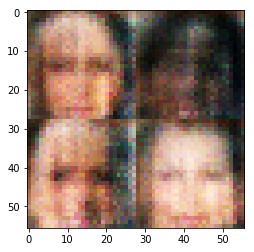

Epoch 1/1... Discriminator Loss: 1.6333... Generator Loss: 0.3809
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.4080
Epoch 1/1... Discriminator Loss: 0.7074... Generator Loss: 1.1497
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.5534
Epoch 1/1... Discriminator Loss: 0.6463... Generator Loss: 1.9308
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.4236
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 0.5662
Epoch 1/1... Discriminator Loss: 2.0088... Generator Loss: 0.2676
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 0.5953
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 1.0932


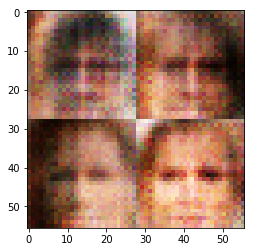

Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 2.7602
Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.0827... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 0.8857... Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 2.6290
Epoch 1/1... Discriminator Loss: 0.8586... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.1632... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.5072
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 0.6485


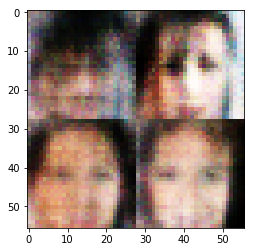

Epoch 1/1... Discriminator Loss: 0.7317... Generator Loss: 1.5930
Epoch 1/1... Discriminator Loss: 1.0678... Generator Loss: 0.6080
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.4365
Epoch 1/1... Discriminator Loss: 1.7503... Generator Loss: 0.2431
Epoch 1/1... Discriminator Loss: 1.3146... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 3.2543
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 1.0516
Epoch 1/1... Discriminator Loss: 0.7495... Generator Loss: 1.6081
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.5435
Epoch 1/1... Discriminator Loss: 0.8230... Generator Loss: 1.0455


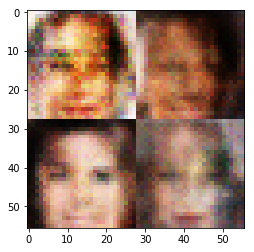

Epoch 1/1... Discriminator Loss: 1.5274... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 1.1499... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 0.8970... Generator Loss: 0.9833
Epoch 1/1... Discriminator Loss: 0.9341... Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.0125... Generator Loss: 0.8482
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.4187
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.4300
Epoch 1/1... Discriminator Loss: 1.1293... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.1467... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.3594


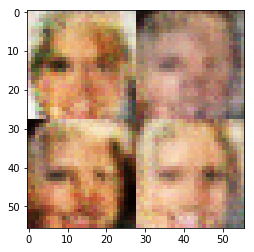

Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.3284
Epoch 1/1... Discriminator Loss: 0.9639... Generator Loss: 1.4601
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.4540
Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 1.6504
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.3890
Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 1.6935
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.4269
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.6395


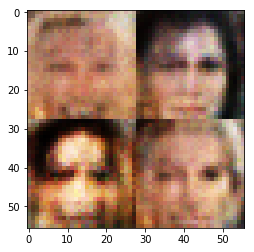

Epoch 1/1... Discriminator Loss: 1.1389... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.5232
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.8633... Generator Loss: 0.2132
Epoch 1/1... Discriminator Loss: 0.9380... Generator Loss: 0.8516
Epoch 1/1... Discriminator Loss: 1.2452... Generator Loss: 0.4492
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 0.8490
Epoch 1/1... Discriminator Loss: 0.9859... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.6316


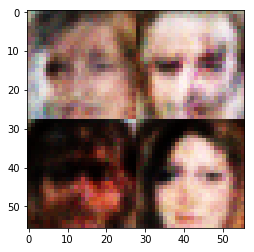

Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 1.3461
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.4211
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.5008... Generator Loss: 0.3681
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.5190
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.4296


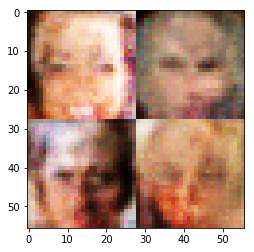

Epoch 1/1... Discriminator Loss: 1.7955... Generator Loss: 0.2287
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 1.5398... Generator Loss: 0.3075
Epoch 1/1... Discriminator Loss: 0.8263... Generator Loss: 1.3148
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.2727
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.4173
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.5374
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.0349... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 0.8256... Generator Loss: 0.8617


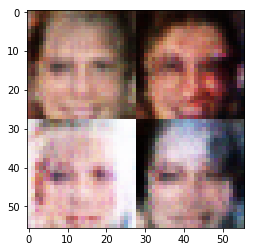

Epoch 1/1... Discriminator Loss: 0.7631... Generator Loss: 2.4248
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.7269
Epoch 1/1... Discriminator Loss: 1.2580... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 0.6122
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.3500
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 1.9261... Generator Loss: 0.2120
Epoch 1/1... Discriminator Loss: 0.9264... Generator Loss: 0.8432


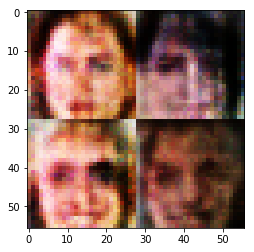

Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.3468
Epoch 1/1... Discriminator Loss: 1.0469... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.0034... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.0521... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 0.7571... Generator Loss: 1.2045
Epoch 1/1... Discriminator Loss: 0.9992... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 0.9307... Generator Loss: 0.8123
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.1602
Epoch 1/1... Discriminator Loss: 0.7144... Generator Loss: 1.6792
Epoch 1/1... Discriminator Loss: 1.5151... Generator Loss: 0.3177


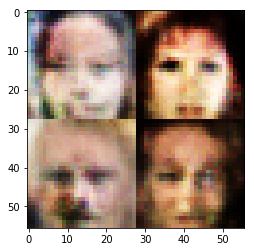

Epoch 1/1... Discriminator Loss: 0.8299... Generator Loss: 1.6995
Epoch 1/1... Discriminator Loss: 1.6716... Generator Loss: 2.0109
Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 0.8099... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 0.8071... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.9821... Generator Loss: 0.2057
Epoch 1/1... Discriminator Loss: 1.0379... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 0.4615... Generator Loss: 2.8002
Epoch 1/1... Discriminator Loss: 2.7551... Generator Loss: 0.0841


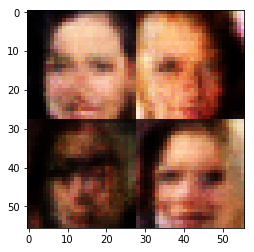

Epoch 1/1... Discriminator Loss: 0.5501... Generator Loss: 1.2101
Epoch 1/1... Discriminator Loss: 0.6907... Generator Loss: 1.1289
Epoch 1/1... Discriminator Loss: 0.8669... Generator Loss: 0.8706
Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 1.8176
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 2.0054... Generator Loss: 1.2638
Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 0.7778
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 1.4360
Epoch 1/1... Discriminator Loss: 0.7705... Generator Loss: 2.1717
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 0.6451


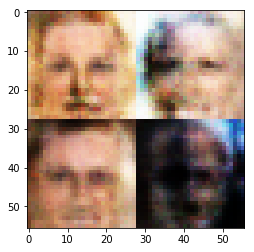

Epoch 1/1... Discriminator Loss: 2.0359... Generator Loss: 0.2075
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.7440
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 0.4499... Generator Loss: 1.5705
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 3.6078
Epoch 1/1... Discriminator Loss: 0.8969... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 0.9358... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 0.4262... Generator Loss: 1.7866
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.4075
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 0.9265


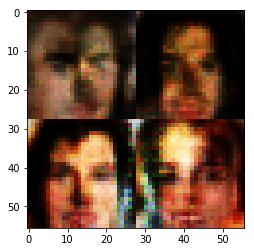

Epoch 1/1... Discriminator Loss: 2.8026... Generator Loss: 0.0751
Epoch 1/1... Discriminator Loss: 0.9793... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 0.4433... Generator Loss: 2.0099
Epoch 1/1... Discriminator Loss: 0.2560... Generator Loss: 2.1179
Epoch 1/1... Discriminator Loss: 1.1060... Generator Loss: 1.2202
Epoch 1/1... Discriminator Loss: 0.6740... Generator Loss: 3.3106
Epoch 1/1... Discriminator Loss: 2.0422... Generator Loss: 0.1869
Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 0.7624
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 1.9537
Epoch 1/1... Discriminator Loss: 0.5679... Generator Loss: 1.1243


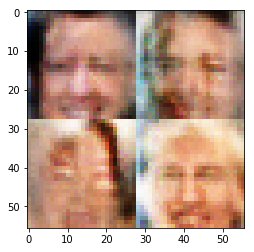

Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 1.6634
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 0.3195... Generator Loss: 3.4236
Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 0.4825
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.5081
Epoch 1/1... Discriminator Loss: 2.3949... Generator Loss: 0.1166
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 1.7178
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 1.2066
Epoch 1/1... Discriminator Loss: 0.2384... Generator Loss: 2.3056
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 0.7293


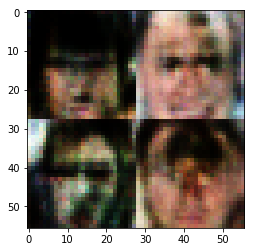

Epoch 1/1... Discriminator Loss: 0.9544... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 0.2437... Generator Loss: 2.0857
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 1.2874
Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.5292
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 1.0117
Epoch 1/1... Discriminator Loss: 0.5248... Generator Loss: 3.3830
Epoch 1/1... Discriminator Loss: 0.7679... Generator Loss: 0.9346
Epoch 1/1... Discriminator Loss: 0.3249... Generator Loss: 1.8661
Epoch 1/1... Discriminator Loss: 0.7333... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 0.6189


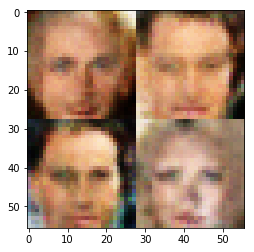

Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 0.5222... Generator Loss: 1.7830
Epoch 1/1... Discriminator Loss: 0.6838... Generator Loss: 1.1449
Epoch 1/1... Discriminator Loss: 1.6475... Generator Loss: 0.2766
Epoch 1/1... Discriminator Loss: 0.8586... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 0.2673... Generator Loss: 1.9506
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 0.6147... Generator Loss: 2.0827
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 0.5289
Epoch 1/1... Discriminator Loss: 1.5863... Generator Loss: 1.5445


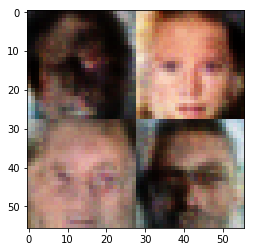

Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.5313
Epoch 1/1... Discriminator Loss: 0.3522... Generator Loss: 1.6516
Epoch 1/1... Discriminator Loss: 1.5696... Generator Loss: 0.2988
Epoch 1/1... Discriminator Loss: 0.6756... Generator Loss: 0.9073
Epoch 1/1... Discriminator Loss: 0.2978... Generator Loss: 3.3515
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 3.2898
Epoch 1/1... Discriminator Loss: 0.7677... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 1.0317
Epoch 1/1... Discriminator Loss: 2.7086... Generator Loss: 0.1124
Epoch 1/1... Discriminator Loss: 1.1282... Generator Loss: 0.4725


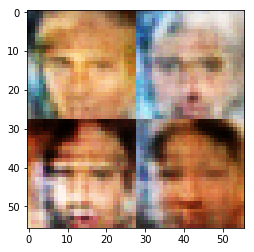

Epoch 1/1... Discriminator Loss: 0.2028... Generator Loss: 3.3702
Epoch 1/1... Discriminator Loss: 0.3288... Generator Loss: 1.6739
Epoch 1/1... Discriminator Loss: 1.6534... Generator Loss: 0.3095
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 0.5876
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.3865
Epoch 1/1... Discriminator Loss: 0.5990... Generator Loss: 3.5459
Epoch 1/1... Discriminator Loss: 1.9421... Generator Loss: 0.1943
Epoch 1/1... Discriminator Loss: 0.5609... Generator Loss: 1.1111
Epoch 1/1... Discriminator Loss: 0.1426... Generator Loss: 3.4003
Epoch 1/1... Discriminator Loss: 0.8797... Generator Loss: 0.6718


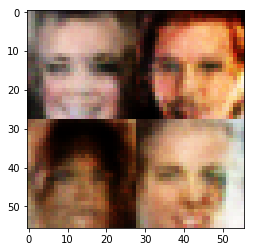

Epoch 1/1... Discriminator Loss: 1.9617... Generator Loss: 0.1981
Epoch 1/1... Discriminator Loss: 0.3127... Generator Loss: 2.2729
Epoch 1/1... Discriminator Loss: 0.2172... Generator Loss: 2.2123
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 1.3045
Epoch 1/1... Discriminator Loss: 0.9949... Generator Loss: 0.6616
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.3100
Epoch 1/1... Discriminator Loss: 0.2300... Generator Loss: 3.1626
Epoch 1/1... Discriminator Loss: 0.6644... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 0.4184... Generator Loss: 1.2680
Epoch 1/1... Discriminator Loss: 0.3297... Generator Loss: 3.7893


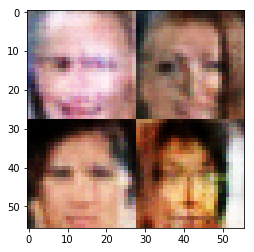

Epoch 1/1... Discriminator Loss: 0.6847... Generator Loss: 4.4261
Epoch 1/1... Discriminator Loss: 0.9583... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 0.2948... Generator Loss: 1.8215
Epoch 1/1... Discriminator Loss: 0.1823... Generator Loss: 2.7438
Epoch 1/1... Discriminator Loss: 0.6692... Generator Loss: 1.5176
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 0.8632
Epoch 1/1... Discriminator Loss: 0.3071... Generator Loss: 1.9489
Epoch 1/1... Discriminator Loss: 0.2438... Generator Loss: 2.2581
Epoch 1/1... Discriminator Loss: 0.3105... Generator Loss: 1.6199
Epoch 1/1... Discriminator Loss: 0.2657... Generator Loss: 2.9870


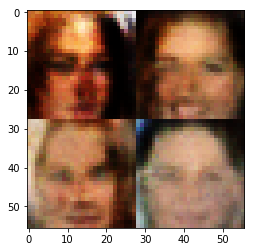

Epoch 1/1... Discriminator Loss: 1.8457... Generator Loss: 0.2519
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 0.9956... Generator Loss: 1.0340
Epoch 1/1... Discriminator Loss: 0.8714... Generator Loss: 1.0027
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 0.9796... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.4576
Epoch 1/1... Discriminator Loss: 0.5518... Generator Loss: 1.4368
Epoch 1/1... Discriminator Loss: 0.4470... Generator Loss: 2.3191


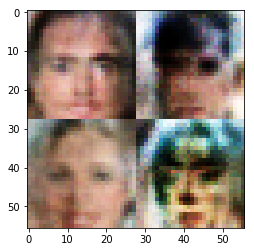

Epoch 1/1... Discriminator Loss: 0.5391... Generator Loss: 1.0741
Epoch 1/1... Discriminator Loss: 0.7905... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 0.2395... Generator Loss: 2.2260
Epoch 1/1... Discriminator Loss: 0.3102... Generator Loss: 1.7898
Epoch 1/1... Discriminator Loss: 0.1729... Generator Loss: 3.3978
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 0.5817
Epoch 1/1... Discriminator Loss: 0.1203... Generator Loss: 3.7512
Epoch 1/1... Discriminator Loss: 0.8562... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 0.2544... Generator Loss: 1.7310
Epoch 1/1... Discriminator Loss: 0.2553... Generator Loss: 2.2206


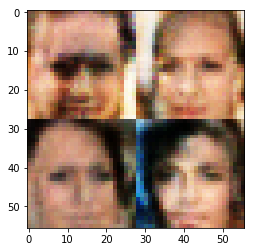

Epoch 1/1... Discriminator Loss: 0.1462... Generator Loss: 2.6352
Epoch 1/1... Discriminator Loss: 0.3846... Generator Loss: 1.4458
Epoch 1/1... Discriminator Loss: 0.7252... Generator Loss: 0.9846
Epoch 1/1... Discriminator Loss: 2.2793... Generator Loss: 0.1384
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 0.9270
Epoch 1/1... Discriminator Loss: 0.0803... Generator Loss: 4.3384
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.4539
Epoch 1/1... Discriminator Loss: 0.1201... Generator Loss: 3.4675
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 1.2947
Epoch 1/1... Discriminator Loss: 1.0321... Generator Loss: 1.5063


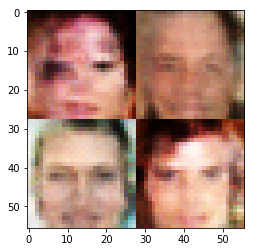

Epoch 1/1... Discriminator Loss: 1.6752... Generator Loss: 0.3668
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.5053
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.3830
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.5861
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 0.4362
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 2.5738
Epoch 1/1... Discriminator Loss: 0.3934... Generator Loss: 1.7154
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.4232
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.5649


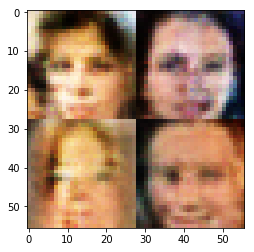

Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 0.2878... Generator Loss: 1.7047
Epoch 1/1... Discriminator Loss: 0.4670... Generator Loss: 1.1998
Epoch 1/1... Discriminator Loss: 0.2508... Generator Loss: 3.2373
Epoch 1/1... Discriminator Loss: 1.1706... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 0.2433... Generator Loss: 1.8591
Epoch 1/1... Discriminator Loss: 0.3600... Generator Loss: 4.5790
Epoch 1/1... Discriminator Loss: 0.1621... Generator Loss: 2.4484
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.4098
Epoch 1/1... Discriminator Loss: 0.2301... Generator Loss: 2.5439


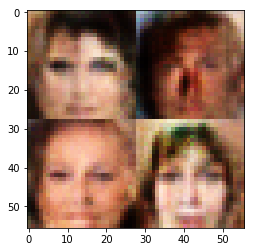

Epoch 1/1... Discriminator Loss: 1.7078... Generator Loss: 0.3011
Epoch 1/1... Discriminator Loss: 0.2685... Generator Loss: 1.7617
Epoch 1/1... Discriminator Loss: 0.2764... Generator Loss: 1.9471
Epoch 1/1... Discriminator Loss: 1.1065... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.4684
Epoch 1/1... Discriminator Loss: 0.2642... Generator Loss: 1.7864
Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 0.1807... Generator Loss: 2.5590
Epoch 1/1... Discriminator Loss: 0.0715... Generator Loss: 3.6436
Epoch 1/1... Discriminator Loss: 0.1735... Generator Loss: 2.3982


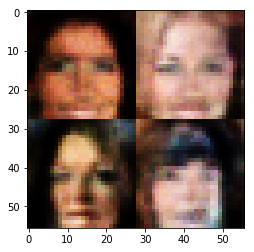

Epoch 1/1... Discriminator Loss: 0.3140... Generator Loss: 1.5939
Epoch 1/1... Discriminator Loss: 0.5130... Generator Loss: 1.1827
Epoch 1/1... Discriminator Loss: 0.4283... Generator Loss: 4.9692
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 3.1347
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 0.7659... Generator Loss: 1.1049
Epoch 1/1... Discriminator Loss: 1.3093... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 0.7862


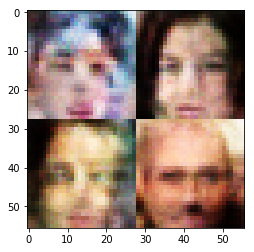

Epoch 1/1... Discriminator Loss: 0.6251... Generator Loss: 1.2043
Epoch 1/1... Discriminator Loss: 1.8418... Generator Loss: 0.2071
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 0.8852... Generator Loss: 1.0476
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.3803
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 0.5873
Epoch 1/1... Discriminator Loss: 0.0886... Generator Loss: 4.4440
Epoch 1/1... Discriminator Loss: 1.6368... Generator Loss: 0.2662
Epoch 1/1... Discriminator Loss: 0.1667... Generator Loss: 2.7679


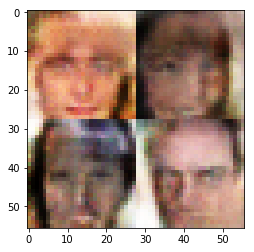

Epoch 1/1... Discriminator Loss: 0.6542... Generator Loss: 1.0125
Epoch 1/1... Discriminator Loss: 1.6767... Generator Loss: 0.2928
Epoch 1/1... Discriminator Loss: 0.1443... Generator Loss: 2.5887
Epoch 1/1... Discriminator Loss: 0.1423... Generator Loss: 2.4926
Epoch 1/1... Discriminator Loss: 0.3352... Generator Loss: 1.5026
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.3126
Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 0.5914
Epoch 1/1... Discriminator Loss: 0.1050... Generator Loss: 4.5155
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 1.9934
Epoch 1/1... Discriminator Loss: 0.4906... Generator Loss: 3.2389


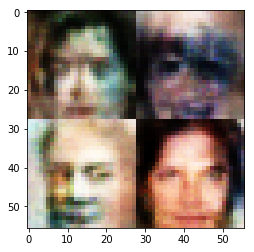

Epoch 1/1... Discriminator Loss: 0.4502... Generator Loss: 1.3383
Epoch 1/1... Discriminator Loss: 0.0771... Generator Loss: 4.5779
Epoch 1/1... Discriminator Loss: 0.1919... Generator Loss: 3.5504
Epoch 1/1... Discriminator Loss: 0.7790... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 0.0572... Generator Loss: 5.0631
Epoch 1/1... Discriminator Loss: 0.3764... Generator Loss: 1.3802
Epoch 1/1... Discriminator Loss: 0.3732... Generator Loss: 7.5024
Epoch 1/1... Discriminator Loss: 1.5946... Generator Loss: 0.2901
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 0.6519


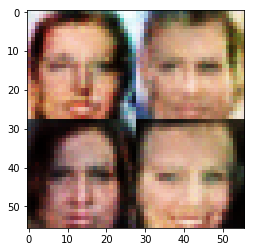

Epoch 1/1... Discriminator Loss: 0.7776... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 1.2317


KeyboardInterrupt: 

In [56]:
batch_size = 32
z_dim = 500
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.